
<a id='chap-tpintroductionapprentissagesupervise'></a>

# Travaux pratiques - Introduction à l’apprentissage supervisé

**L’objectif** de cette première séance de travaux pratiques est de vous faire découvrir les problèmes de classification et les problèmes de régression à l'aide de modèles simples : régressions linéaires et polynomiales et arbres de décision.

Références externes utiles :
- [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Documentation de scikit-learn](http://scikit-learn.org/stable/index.html)  

In [1]:
# Import des bibliothèques utiles
import matplotlib.pyplot as plt
import numpy as np
import sklearn

## Régression avec modèles linéaires et polynomiaux

Pour commencer ce premier TP, nous examinerons un problème simple de
régression avec une seule variable prédictive, similaire à celui
illustré dans le support de cours. À partir d’un ensembles
d’observations $ \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\} $,
l’objectif est de trouver la fonction $ \hat{f} $ telle que
$ \hat{f}(x_i) = y_i $.

Pour cet exemple, commençons par générer des données synthétiques. En
pratique, nous n’aurions bien entendu pas à réaliser ce travail : le jeu
de données est constitué des observations réelles. Notre jeu de données
d’exemple consiste en une portion de sinusoïde sur laquelle un bruit
gaussien a été appliqué.

In [2]:
# Fixe l'aléas pour pouvoir reproduire les résultats
np.random.seed(0)
# On tire au hasard 100 points dans l'intervalle [0,2]
X = 2 * np.random.rand(100, 1)
# On calcule la valeur de sin(x) pour chaque point, plus un bruit gaussien aléatoire
y = np.sin(X[:,0]) + 0.15 * np.random.randn(100)

Nous pouvons visualisation toutes les données générées, qui forment
notre matrice d’observation pour ce problème de régression :

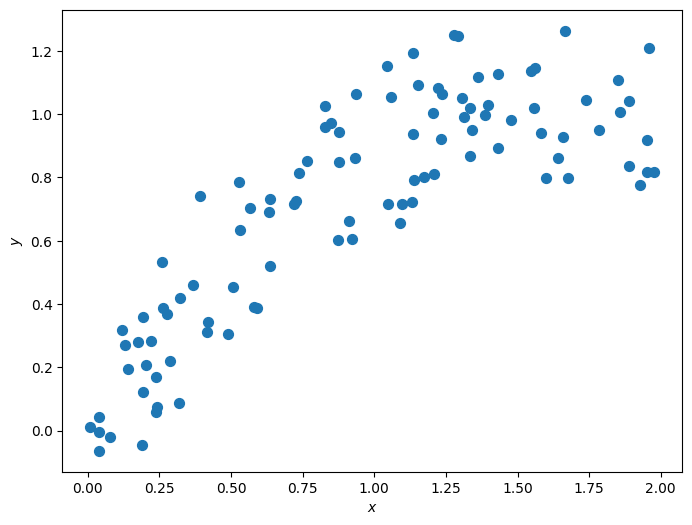

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, s=50)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

Nous générons maintenant un premier découpage entre données d’apprentissage et données de test. Ce découpage est aléatoire et
s’effectue à l’aide de la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
de scikit-learn. Le paramètre `test_size` permet de spécifier le pourcentage du jeu de données qui sera contenu dans le jeu de test.

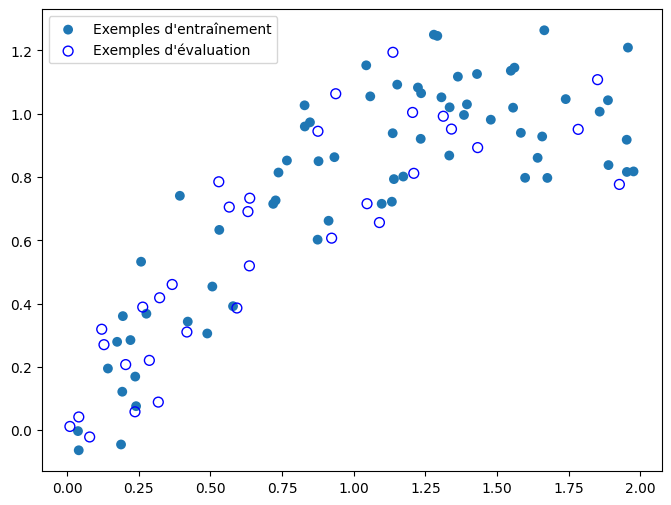

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, s=50, edgecolors='none', label="Exemples d'entraînement")
plt.scatter(X_test, y_test, c='none', s=50, edgecolors='blue', label="Exemples d'évaluation")
plt.legend()
plt.show()

Nous cherchons d’abord un modèle linéaire pour ce problème de régression. Regardez la classe
[LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
de scikit-learn (ainsi que [ces explications](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)).
Dans le cas présent, scikit-learn va chercher la fonction affine $ f: x \rightarrow y = ax + b $ en déterminant les paramètres
$ a $ et $ b $ à l’aide de la méthode des moindres carrés.

Les résultats sont évalués ici à travers le **coefficient de détermination**, qui est le rapport entre la variance expliquée par le
modèle et la variance totale (de la variable expliquée), voir [les explications](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

Commençons par instancier un modèle de régression linéaire.

In [5]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

Tous les modèles implémentés dans scikit-learn suivent la même interface et présentent au moins les trois méthodes suivantes :

- `.fit()` permet d’apprendre le modèle en estimant ses paramètres à
  partir d’un jeu de données,  
- `.predict()` ou `.transform()` permet d’appliquer le modèle à de
  nouvelles données,  
- `.score()` permet d’évaluer le modèle selon un critère prédéfini
  (taux de bonne classification, coefficient de détermination, etc.)
  sur un jeu de test.  


Par exemple, dans notre cas, la méthode `.fit(X,y)` permet de déterminer les paramètres de la régression linéaire à partir de nos
observations `X` et de notre vérité terrain `y`.

In [6]:
# optimisation du modèle: détermination des paramètres de la régression linéaire par la méthode des moindres carrés
reg.fit(X_train, y_train)

LinearRegression()

Nous pouvons évaluer à quel point le modèle « colle » aux données à l’aide du coefficient de détermination calculé sur les exemples du jeu
d’apprentissage :

In [7]:
# attention, score() ici ne renvoie pas l'erreur mais la valeur du coefficient de détermination R² !
coeff_train = reg.score(X_train, y_train)
print(f"Coefficient de détermination R² en train : {coeff_train:.2f}")

Coefficient de détermination R² en train : 0.64


## Question:

Calculer le coefficient de détermination R² sur le jeu de test. Que constatez-vous ?

## Correction

In [8]:
coeff_test = reg.score(X_test, y_test)
print(f"Coefficient de détermination R² en test : {coeff_test:.2f}")

Coefficient de détermination R² en test : 0.68


Nous pouvons ensuite, à partir des coefficients qui ont été estimés,
tracer notre modèle de régression :

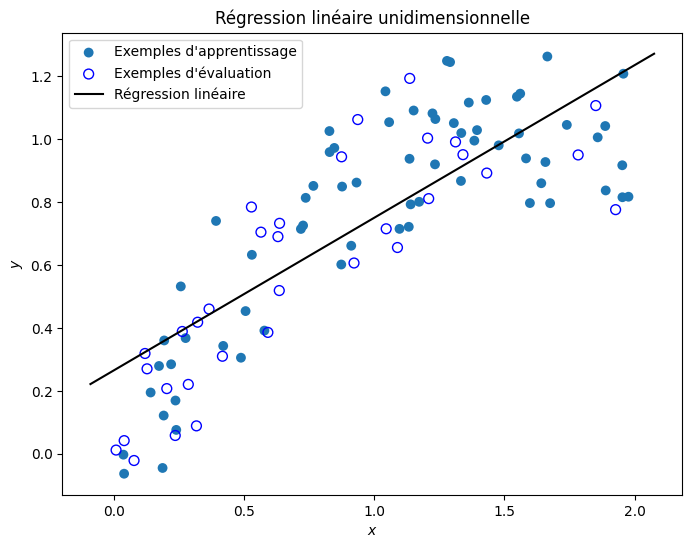

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train,y_train, s=50, edgecolors='none', label="Exemples d'apprentissage")
plt.scatter(X_test,y_test, c='none', s=50, edgecolors='blue', label="Exemples d'évaluation")
plt.xlabel("$x$")
plt.ylabel("$y$")

x_min, x_max = plt.xlim()
nx = 100
xx = np.linspace(x_min, x_max, nx).reshape(-1,1)
plt.plot(xx,reg.predict(xx), color='k', label="Régression linéaire")
plt.title("Régression linéaire unidimensionnelle")
plt.legend()
plt.show()

## Question

Calculez l’erreur quadratique moyenne du modèle sur les données d’apprentissage et ensuite sur les données de test. Vous pouvez
l’implémenter vous-même à l’aide de NumPy ou bien consulter la [documentation du module
sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

## Correction

In [10]:
from sklearn.metrics import mean_squared_error
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f"MSE = {mse_train:.3f} (train)")
print(f"MSE = {mse_test:.3f} (test)")

MSE = 0.043 (train)
MSE = 0.040 (test)


### Régression polynomiale

La régression linéaire est un outil pratique mais quelque peu limité : les relations entre les variables explicatives et la variable à prédire
sont rarement linéaires en pratique ! Nous pourrions chercher dans une famille paramétrique plus grande, par exemple les polynômes à une seule
variable de degré $ d $ : $ P : x \rightarrow a_0 + a_1 x + a_2 x^2 + \dots + a_d x^d $.

La visualisation interactive ci-dessous permet de visualiser les résultats d’une régression polynomiale appliquée sur notre jeu de
données, de tracer la régression et d’afficher les coefficients de détermination R² en apprentissage et en test.

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline

from ipywidgets import interact, fixed

@interact(degree=(0,10,1), show=fixed(True))
def polynomial_fit(degree, show=False):
    pipe = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                    ('reg', linear_model.LinearRegression())])

    pipe.fit(X_train, y_train)
    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)

    if show:
        plt.figure(figsize=(8, 6))
        plt.scatter(X_train, y_train, s=50, edgecolors='none', label="Exemples d'apprentissage")
        plt.scatter(X_test, y_test, c='none', s=50, edgecolors='blue', label="Exemples de test")
        x_min, x_max = plt.xlim()
        xx = np.linspace(x_min, x_max, nx).reshape(-1,1)
        plt.plot(xx,pipe.predict(xx),color='black', label="Régression polynomiale")
        plt.legend()
        plt.show()

        print(f"Coefficient R² (train): {train_score:.3f}")
        print(f"Coefficient R² (test): {test_score:.3f}")
    return train_score, test_score

interactive(children=(IntSlider(value=5, description='degree', max=10), Output()), _dom_classes=('widget-inter…

### Question

Que se passe-t-il lorsque l’on modifie le degré du polynôme ? Quelles observations pouvez-vous faire concernant le sous-apprentissage ? Le sur-apprentissage ?

### Correction

Lorsque le degré du polynôme est faible (0 ou 1), la correspondance entre la courbe réelle et le modèle de régression est mauvaise (score R² faible, voire négatif). Nous sommes en sous-apprentissage: l’erreur d’approximation est élevée car le modèle que l’on choisit (constante ou régression linéaire) est une mauvaise hypothèse par rapport aux données réelles.

Lorsque l’on augmente le degré, le coefficient R² se rapproche de 1 sur les exemples d’apprentissage, mais diminue sur les exemples de test. Visuellement, la variance des prédictions augmente: nous sommes en sur-apprentissage. Le modèle dispose de trop de paramètres libres qui viennent « coller » au bruit statistique dans les données, mais cela ne généralise pas sur les exemples de test.

### Question

*(pour aller plus loin)* Tracer les courbes du coefficient R² sur le jeu d’apprentissage et sur le jeu de test en fonction du degré du polynôme (entre 1 et 10). Vous
pouvez utiliser la fonction `polynomial_fit` pour ce faire qui renvoie un tuple contenant les deux scores. Que constatez-vous ?

### Correction

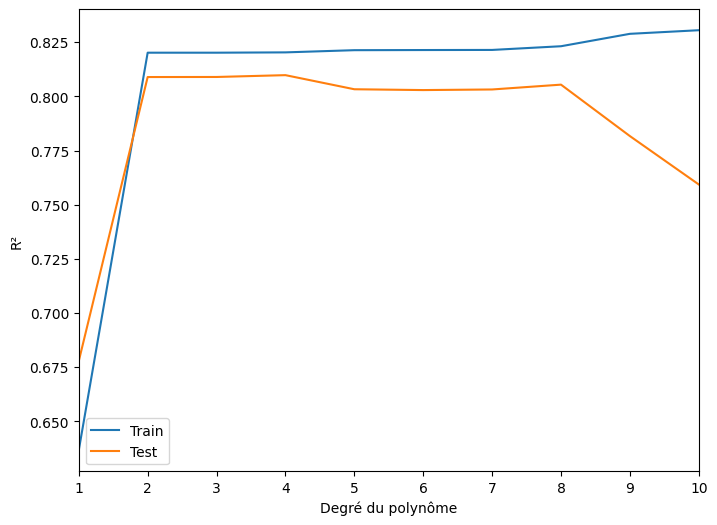

In [12]:
degrees = np.arange(1, 11, 1)
train_scores, test_scores = zip(*[polynomial_fit(d, show=False) for d in degrees])

fig = plt.figure(figsize=(8, 6))
plt.plot(degrees, train_scores, label="Train")
plt.plot(degrees, test_scores, label="Test")
plt.xlabel("Degré du polynôme")
plt.ylabel("R²")
plt.legend()
plt.xlim(1, 10)
plt.show()

## Classification avec modèles linéaires et non-linéaires

Voyons maintenant comment les notions de sur-apprentissage et sous-apprentissage peuvent se manifester dans le cas d’un problème de
classement (ou classification). Nous examinerons un problème simple de discrimination entre deux classes, similaire à celui illustré dans le
support de cours.

Nous générons des données à partir de lois normales bidimensionnelles. Pour la première classe nous employons une seule loi avec des variances
différentes et une rotation qui introduit des covariances. La seconde classe est un mélange de 4 lois normales avec des centres différents.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# fixer la graine aléatoire de numpy permet d'obtenir systématiquement les mêmes résultats
np.random.seed(150)

from sklearn import datasets

dataset = "gaussian"

if dataset == "gaussian":
    # définir matrices de rotation et de dilatation
    rot = np.array([[0.94, -0.34], [0.34, 0.94]])
    sca = np.array([[3.4, 0], [0, 2]])
    # générer données classe 1
    c1d = (np.random.randn(200,2)).dot(sca).dot(rot)

    # générer données classe 2
    c2d1 = np.random.randn(25,2)+[-10, 2]
    c2d2 = np.random.randn(25,2)+[-7, -2]
    c2d3 = np.random.randn(25,2)+[-2, -6]
    c2d4 = np.random.randn(25,2)+[5, -7]

    data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))

    # générer étiquettes de classe
    l1c = np.ones(200, dtype=int)
    l2c = np.zeros(100, dtype=int)
    labels = np.concatenate((l1c, l2c))
elif dataset == "iris":
    iris_X, iris_y = datasets.load_iris(return_X_y=True)
    data = iris_X[:, :2]
    labels = iris_y
elif dataset == "wine":
    wine_X, wine_y = datasets.load_wine(return_X_y=True)
    data = wine_X[:, (0,10)]
    labels = wine_y

Visualisation de toutes les données :

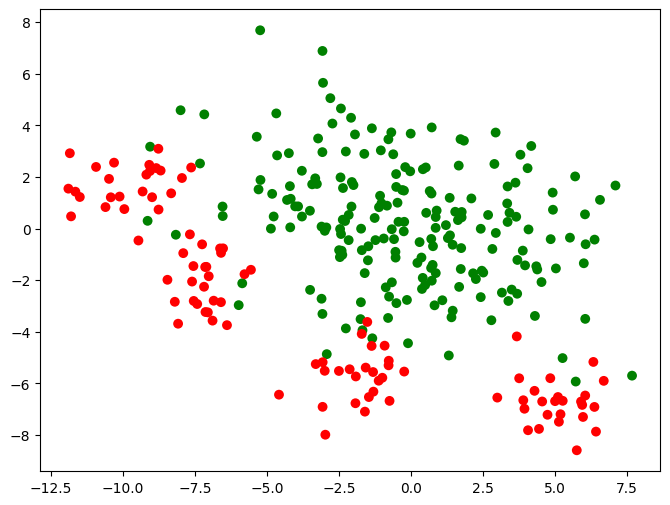

In [14]:
# les échantillons du premier groupe sont en rouge 'r', ceux du deuxième groupe en vert ("green") 'g'
cmp = np.array(['r','g', 'b'])
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0],data[:,1], c=cmp[labels], s=50, edgecolors='none')
plt.show()

Nous générons maintenant un premier découpage entre données d’apprentissage et données de test. Les données de test sont affichées
avec cercles vides (`c='none'`), les données d’apprentissage avec des cercles remplis.

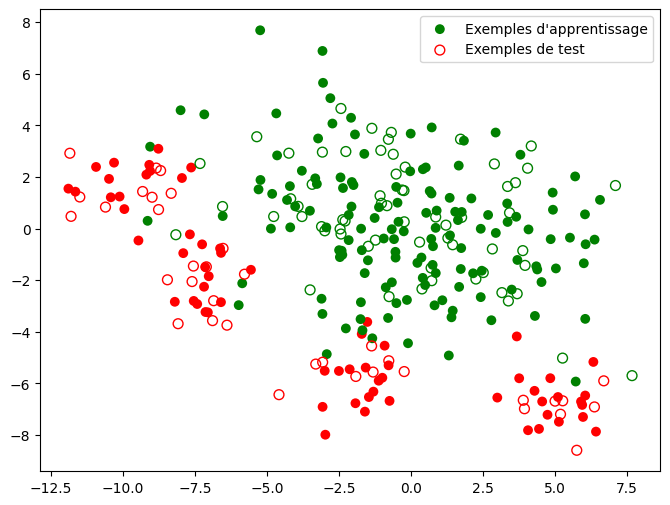

In [15]:
from sklearn.model_selection import train_test_split

# découpage des données en train et test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_train[:,0],X_train[:,1],c=cmp[y_train], s=50, edgecolors='none', label="Exemples d'apprentissage")
plt.scatter(X_test[:,0], X_test[:,1], c='none' ,s=50, edgecolors=cmp[y_test], label="Exemples de test")
plt.legend()
plt.show()

## Question

Combien d’échantillons le jeu de données d’apprentissage contient-il ? La [documentation de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
peut vous aider.

## Correction

Le paramètre test_size=0.33 signifie que l’on conserve 33% des données pour le jeu de test. Le jeu d’apprentissage contient donc 67% des observations, soit 134 échantillons (le jeu de données gaussien contient 200 exemples).

### Modèle linéaire : SVM

Nous cherchons d’abord un modèle linéaire pour ce problème de discrimination entre deux classes et utilisons pour cela une machine à vecteur de support (SVM). En résumé, cette méthode cherche la frontière de décision linéaire qui sépare au mieux les données.

In [16]:
from sklearn.svm import LinearSVC
svm = LinearSVC()

# évaluation et affichage sur split1
svm.fit(X_train, y_train)
print("Le score sur le jeu d'apprentissage est de : {:.3f}".format(svm.score(X_train, y_train)))

print("Le score sur le jeu de test est de : {:.3f}".format(svm.score(X_test, y_test)))

Le score sur le jeu d'apprentissage est de : 0.856
Le score sur le jeu de test est de : 0.919


/home/NAudebert/.venvs/dl/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/NAudebert/.venvs/dl/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Question

À l’aide de la documentation de scikit-learn, déterminez à quoi correspond la valeur renvoyée par la méthode .score().

### Correction

.score() calcule la métrique habituelle de classification: l”*accuracy* (en français, le taux de bonnes prédictions), c’est-à-dire le pourcentage d’exemples dont la classe a été correctement prédite par le modèle.

Comme précédemment pour l’analyse factorielle discriminante, nous pouvons désormais tracer la frontière de décision du perceptron multicouche que nous venons d’optimiser.

Nous pouvons examiner visuellement le modèle trouvé (la frontière de
discrimination linéaire, c’est-à-dire ici une droite dans le plan) :

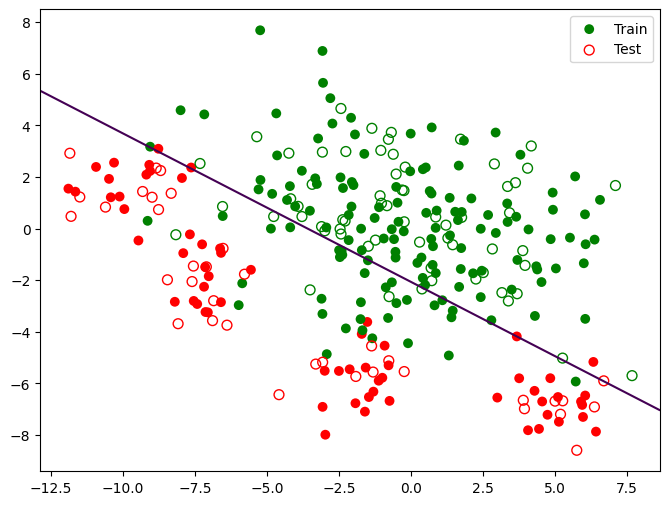

In [17]:
# on créé une nouvelle figure sur laquelle on affiche les points
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:,0], X_train[:,1], c=cmp[y_train], s=50, edgecolors='none', label="Train")
plt.scatter(X_test[:,0],  X_test[:,1], c='none', s=50, edgecolors=cmp[y_test], label="Test")

# on calcule pour chaque point du plan sa probabilité d'appartenir à chaque classe
nx, ny = 400, 400
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
# meshgrid permet d'échantillonner tous les points du plan (entre x_min et x_max)
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
# .decision_function permet d'obtenir le "score" assigné par la SVM à chaque observation
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
#for cls_idx in range(max(labels)):
zz = Z.reshape(xx.shape)
# on dessine la frontière correspond à un score de 0,5
# les scores < 0,5 correspondent à la classe 0
# les scores > 0,5 correspondent à la classe 1
plt.contour(xx, yy, zz, [0.5])
plt.legend()
plt.show()

## Question

À l'aide de la [documentation de scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics), calculez la matrice de confusion du modèle, ainsi que son exactitude (*accuracy*).

Au-delà de quelle performance peut-on considérer que le modèle a appris quelque chose ?

## Correction

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[30  6]
 [ 2 61]]


Comme le jeu de de données est déséquilibré (il y a plus de données de la classe 2 que de la classe 1), la baseline à battre est un modèle qui prédirait systématiquement la classe majoritaire, ici la classe 2 : ce modèle obtiendrait ~66% d'*accuracy*.

### Modèle non-linéaire: arbre de classification

Comme vous avez pu le constater, la frontière de séparation idéale entre les deux groupes n’est pas linéaire. Il nous faut donc changer de
famille paramétrique pour en choisir une de plus grande capacité. Nous allons donc utiliser un arbre de décision pour réaliser la classification binaire. Nous utilisons
pour cela la classe [MLPClassifier](https://scikit-learn.org/stable/modules/tree.html)
de scikit-learn. Il est très
instructif d’examiner [les valeurs par défaut des paramètres](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

Il n’est pas indispensable de connaître le fonctionnement précis des arbres de décision pour ce TP, toutefois si le sujet vous intéresse vous pouvez consulter [ce cours](https://cedric.cnam.fr/vertigo/Cours/ml2/coursArbresDecision.html).

Le principal paramètre que nous allons manipuler est la profondeur maximale de l'arbre. Par défaut, scikit-learn ne limite pas la profondeur et l'arbre peut être aussi profond que nécessaire pour que toutes les feuilles ne contiennent que des observations de la même classe.

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None)

# évaluation et affichage sur split1
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print(f"Le score en train est {train_score:.3f}")

test_score = clf.score(X_test, y_test)
print(f"Le score en test est {test_score:.3f}")

Le score en train est 1.000
Le score en test est 0.919


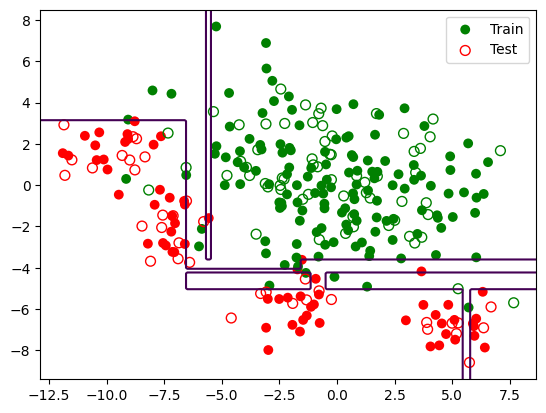

In [20]:
# créer une nouvelle figure
plt.figure()
# afficher les nuages de points apprentissage (remplis) et de test (vides)
plt.scatter(X_train[:,0],X_train[:,1],c=cmp[y_train],s=50, edgecolors='none', label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c='none', s=50, edgecolors=cmp[y_test], label="Test")

# calculer la probabilité de sortie du perceptron pour tous les points du plan
nx, ny = 200, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
for cls_idx in range(max(labels)):
    zz = Z[:, cls_idx].reshape(xx.shape)
    # on dessine la frontière correspond à un score de 0,5
    # les scores < 0,5 correspondent à la classe 0
    # les scores > 0,5 correspondent à la classe 1
    plt.contour(xx, yy, zz, [0.5])
plt.legend()
plt.show()

### Question

Refaites l’expérience avec `max_depth = 2`. Dans quel cas la régularisation est plus forte ? Quelle est la conséquence sur les résultats ?

### Correction

La régularisation est plus élevée lorsque `max_depth=2`. En effet, les arbres de décision obtenus sont moins profonds et donc peuvent modéliser des frontières moins complexes. La frontière est alors nettement moins irrégulière (on réduit la variance en diminuant la capacité du modèle).

La visualisation interactive ci-dessous permet de manipuler la profondeur de l'arbre à la volée :

In [21]:
import ipywidgets as widgets

@interact(max_depth=widgets.IntSlider(min=1, max=10, step=1))
def tree_fit(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)

    # évaluation et affichage sur split1
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    print(f"Le score en train est {train_score:.3f}")

    test_score = clf.score(X_test, y_test)
    print(f"Le score en test est {test_score:.3f}")

    # on créé une nouvelle figure sur laquelle on affiche les points
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:,0], X_train[:,1], c=cmp[y_train], s=50, edgecolors='none', label="Train")
    plt.scatter(X_test[:,0],  X_test[:,1], c='none', s=50, edgecolors=cmp[y_test], label="Test")

    # on calcule pour chaque point du plan sa probabilité d'appartenir à chaque classe
    nx, ny = 400, 400
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    # meshgrid permet d'échantillonner tous les points du plan (entre x_min et x_max)
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
    # .predict_proba permet de prédire le score de chaque classe pour un ensemble d'observations
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    for cls_idx in range(max(labels)):
        zz = Z[:, cls_idx].reshape(xx.shape)
        # on dessine la frontière correspond à un score de 0,5
        # les scores < 0,5 correspondent à la classe 0
        # les scores > 0,5 correspondent à la classe 1
        plt.contour(xx, yy, zz, [0.5])
    plt.legend()
    plt.show()

interactive(children=(IntSlider(value=1, description='max_depth', max=10, min=1), Output()), _dom_classes=('wi…

### Question

Expérimentez avec la visualisation ci-dessus. Que se passe-t-il lorsque la profondeur augmente ? Lorsqu'elle diminue ?
Comment pouvez-vous interpréter ces résultats du point de vue de la capacité du modèle, du sur-apprentissage et du sous-apprentissage ?

### Correction

Augmenter la profondeur de l'arbre revient à augmenter le nombre de paramètres du modèle: la capacité augmente et donc le sur-apprentissage également.

## Question

À l'aide de la fonction [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) de scikit-learn, affichez les performances de classification du modèle obtenu. Quelles sont les métriques utilisées par scikit-learn ? À quoi correspondent-elles ?

## Correction

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.92      0.95      0.94        63

    accuracy                           0.92        99
   macro avg       0.92      0.91      0.91        99
weighted avg       0.92      0.92      0.92        99



scikit-learn calcule la précision, le rappel et leur moyenne harmonique, appelée le score F1. En notant $tp$ les vrais positifs, $fp$ les faux positifs et $fn$ les faux négatifs.

$$p = \frac{tp}{tp + fp}$$

$$r = \frac{tp}{tp + fn}$$

$$F1 = 2 \frac{p \cdot r}{p + r}$$